In [3]:
import os
import h5py
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
nexus_file = "data/fitting_y2023_m10_d18_h11_mn28.h5"
assert os.path.exists(nexus_file)

# load the data

In [5]:
f = h5py.File(nexus_file, 'r')

## integrated image 

In [6]:
image = f['entry']['integrated normalized radiographs']['2D array']

In [7]:
integrated_image = image[:]

In [8]:
height, width = np.shape(integrated_image)

<IPython.core.display.Javascript object>


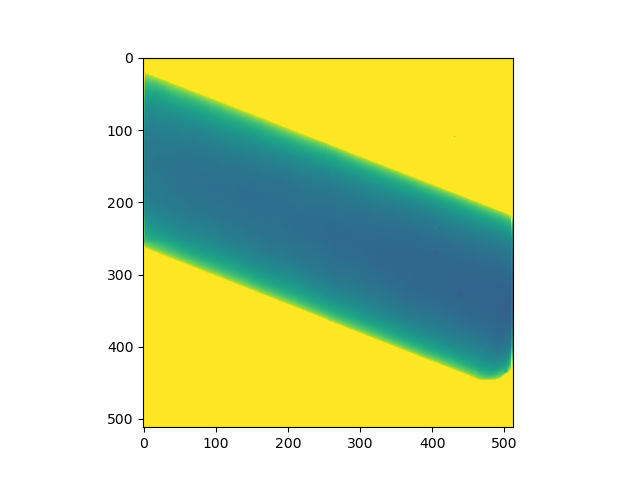

In [9]:
plt.figure(0)
plt.imshow(integrated_image, vmin=0, vmax=1)

## strain map 

In [35]:
#strain_map = np.zeros((height, width))
strain_map = np.empty((height, width))
strain_map[:] = np.nan

In [36]:
x0 = f['entry']['strain mapping']['0']['bin coordinates']['x0'][()]
y0 = f['entry/strain mapping/0/bin coordinates/y0'][()]
x1 = f['entry']['strain mapping']['0']['bin coordinates']['x1'][()]
y1 = f['entry/strain mapping/0/bin coordinates/y1'][()]

In [37]:
for bin_index in f['entry']['strain mapping'].keys():
    x0 = f['entry']['strain mapping'][bin_index]['bin coordinates']['x0'][()]
    y0 = f['entry/strain mapping/' + bin_index + '/bin coordinates/y0'][()]
    x1 = f['entry']['strain mapping'][bin_index]['bin coordinates']['x1'][()]
    y1 = f['entry/strain mapping/' + bin_index + '/bin coordinates/y1'][()]    
    
    strain_value = f['entry/strain mapping/' + bin_index + '/val'][()]
    strain_map[y0: y1, x0: x1] = strain_value
    
    

<IPython.core.display.Javascript object>


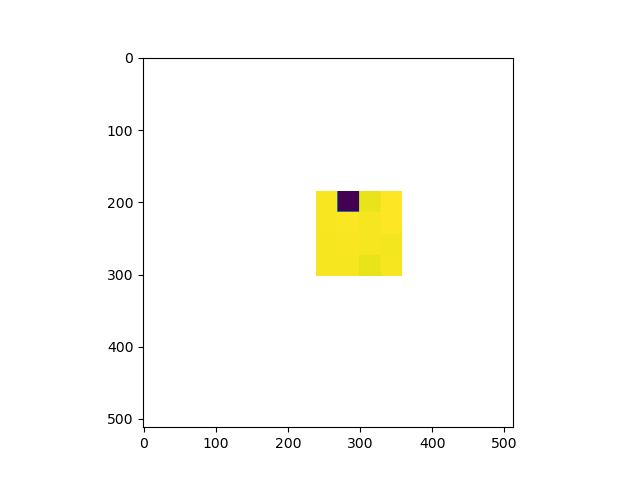

In [38]:
plt.figure(1)
plt.imshow(strain_map)

# overlap of plots 

<IPython.core.display.Javascript object>


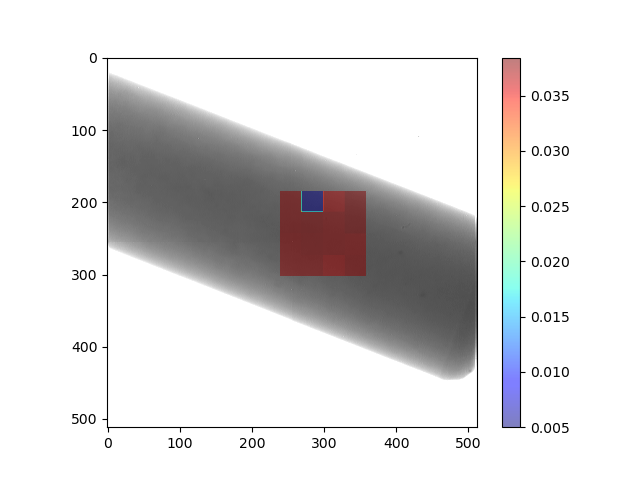

In [47]:
plt.figure(3)
plt.imshow(integrated_image, vmin=0, vmax=1, cmap='gray')
cmap = plt.imshow(strain_map, cmap='jet', alpha=0.5)
plt.colorbar(cmap)

# image2_mask = ma.masked_array(strain_map, strain_map>0)
# plt.imshow(image2_mask, cmap='jet', alpha=0.5)